# Introducing Scikit-learn
Follow _Data Science Handbook_ Ch. 5  [Introducing Scikit-Learn](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb) (p.343-354) and work through:

## Feature matrix and target vector
![](05.02-samples-features.png)

## The five steps
1. Load and arrange data into feature matrix and target vector
2. Choose model class
3. Instantiate model
4. Fit model to data
5. Predict values for new data and evaluate results.

Note the re-ordering of the steps with respect to the text.

## Supervised learning: Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load and arrange data

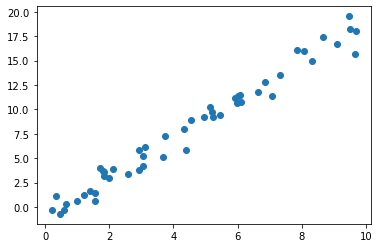

In [3]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y);

In [4]:
# X.shape needs to be (n_samples, n_features)->(50,1)
X = x[:, np.newaxis]
X.shape

(50, 1)

In [5]:
X = x[:, None]
X.shape

(50, 1)

In [6]:
y.shape

(50,)

### 2. Choose model class

In [7]:
from sklearn.linear_model import LinearRegression

### 3. Instatiate model and select Hyperparameters 

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### 4. Fit the model to your data 

In [9]:
model.fit(X, y)

LinearRegression()

In [10]:
model.coef_ #true value is 2.0

array([1.9776566])

In [11]:
model.intercept_ # true values is -1.0

-0.9033107255311164

### 5. Predict labels for unknown data

In [14]:
xfit = np.linspace(-1, 11)

In [15]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [16]:
Xfit = xfit[:, None]
yfit = model.predict(Xfit)

In [17]:
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

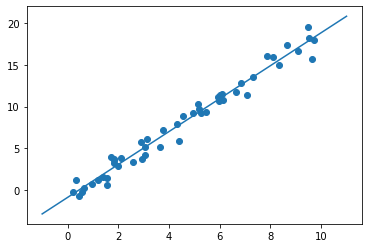

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

Check model performance with metrics

In [19]:
# mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(y, yfit)

87.0410288904572

In [20]:
# default regression metric is r-squared
model.score(X, y)

0.9749140085676858

## Supervised learning: Classification 

### Step 1. 

In [21]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [45]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y_iris = iris['species']
y_iris.shape

(150,)

Leaving out some data, a test set, to evaluate the model on.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [29]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     sepal_length  sepal_width  petal_length  petal_width
54            6.5          2.8           4.6          1.5
108           6.7          2.5           5.8          1.8
112           6.8          3.0           5.5          2.1
17            5.1          3.5           1.4          0.3
119           6.0          2.2           5.0          1.5
..            ...          ...           ...          ...
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
72            6.3          2.5           4.9          1.5
140           6.7          3.1           5.6          2.4
37            4.9          3.6           1.4          0.1

[112 rows x 4 columns]
     sepal_length  sepal_width  petal_length  petal_width
14            5.8          4.0           1.2          0.2
98            5.1          2.5           3.0          1.1
75            6.6          3.0           4.4          1.4
16            5.4          3.9           1.3    

### Steps 2. - 5. 
**Question:** What are the steps?

**Answer:**
- Choose model
- Instantiate model
- Fit model
- Predict labels


In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

In [32]:
model.score(X_test, y_test)

0.9736842105263158

### Confusion matrix
From the digits example later in the text.

Text(91.68, 0.5, 'true value')

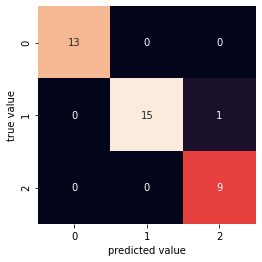

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

We only make one mistake.

## Unsupervised learning: Dimensionslity reduction 
**Question:** How many columns does the `X_iris` feature matrix have?

In [35]:
X_iris.shape

(150, 4)

### Steps 2.-5.

In [36]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris) # only takes the feature matrix
X_2D = model.transform(X_iris)
# get a smaller number of columns while preserving the variability

In [38]:
X_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [37]:
X_2D.shape

(150, 2)

PCA reports how much of the variance in the data is explained by the different principal components. We see that 92.5% of the variance is explained by PCA0:

In [39]:
model.explained_variance_ratio_

array([0.92461872, 0.05306648])

Add the two principal components to the iris `DataFrame` and use seaborn to plot

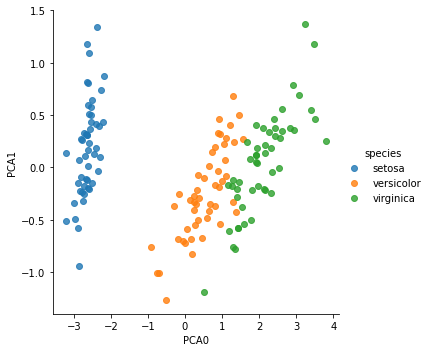

In [40]:
iris['PCA0'] = X_2D[:,0]
iris['PCA1'] = X_2D[:,1]
sns.lmplot(x='PCA0', y='PCA1', hue='species', data=iris, fit_reg=False);

Interesting: It looks like the y-axis is reversed compared to Fig 5-16 in the book. 

## Unsupervised learning: Clustering 

### Steps 2. - 5. 

In [42]:
from sklearn.mixture import GMM
model = GMM(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

Sometimes you have code that uses an older version of the library. Things might be in a different place now.

**Question:** Can you find what `GMM` is called in the current version?
**Answer:** GaussianMixture

In [47]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
model.fit(X_iris)
y_gmm = model.predict(X_iris)

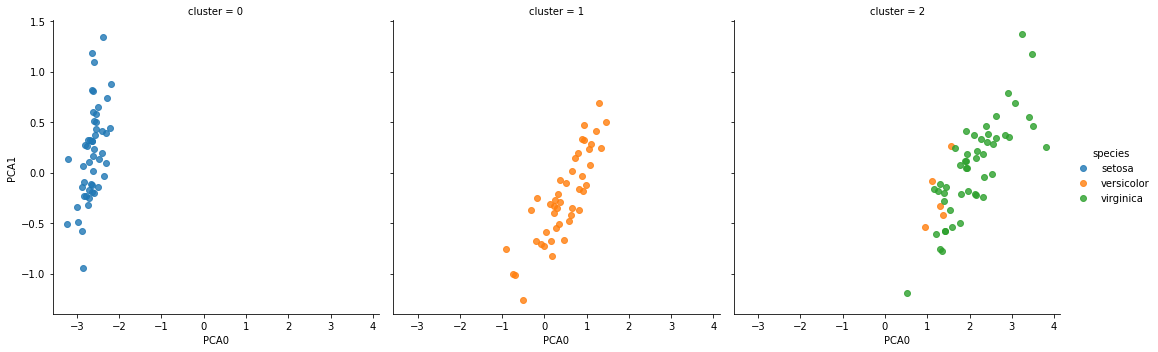

In [48]:
iris['cluster'] = y_gmm
sns.lmplot(x='PCA0', y='PCA1', data=iris, hue='species', col='cluster', fit_reg=False)